In [56]:
# step 5

!pip install fredapi

import pandas as pd
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from fredapi import fred
import yfinance as yfin

In [57]:
def analyze_scenario_data(scenario_name, fred_codes, api_key=None):
    """
    Analyze and visualize data for a specific financial scenario with multiple datasets.

    Parameters:
    - scenario_name (str): A description of the financial scenario.
    - fred_codes (list of str): List of FRED codes for the relevant datasets.
    - api_key (str, optional): The FRED API key (if required).

    Returns:
    - None (displays plots and insights).
    """
    # Define the start date as January 1, 2011
    start_date = datetime.date(2011, 1, 1)
    
    # Define the end date as the current date
    end_date = datetime.date.today()

    # Fetch the data from FRED using the API for each code
    data = {}
    for fred_code in fred_codes:
        data[fred_code] = web.DataReader(fred_code, "fred", start_date, end_date, api_key=api_key)

    # Display the first few rows of the data for each dataset
    for fred_code, dataset in data.items():
        print(f"{scenario_name} - {fred_code} Data:")
        print(dataset.head())

  # Exploratory Data Analysis (EDA) for each dataset
        # Determine whether to draw separate time series plots or a combined plot
    if "relationship" in scenario_name.lower() and len(fred_codes) == 2:
        # Combine datasets in a single time series plot with two y-labels
        plt.figure(figsize=(12, 6))
        for fred_code, dataset in data.items():
            if fred_code == fred_codes[0]:
                ax1 = plt.gca()
                plt.plot(dataset.index, dataset[fred_code], label=f"{scenario_name} - {fred_code}", color='blue')
                plt.ylabel(f"{scenario_name} - {fred_code} Data")
            elif fred_code == fred_codes[1]:
                ax2 = ax1.twinx()
                plt.plot(dataset.index, dataset[fred_code], label=f"{scenario_name} - {fred_code}", color='red')
                plt.ylabel(f"{scenario_name} - {fred_code} Data")
        plt.xlabel("Year")
        plt.title(f"{scenario_name} - Combined Data Over Time")
        lines, labels = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax2.legend(lines + lines2, labels + labels2, loc='upper left')
        plt.grid(True)
        plt.show()
    else:
        # Draw all three graphs for other scenarios
        for fred_code, dataset in data.items():
            plt.figure(figsize=(10, 6))

            # Plotting the data over time (time series plot)
            plt.figure(figsize=(10, 6))
            plt.plot(dataset.index, dataset[fred_code])
            plt.xlabel("Year")
            plt.ylabel(f"{scenario_name} - {fred_code} Data")
            plt.title(f"{scenario_name} - {fred_code} Data Over Time")
            plt.grid(True)

            # Distribution of the data (histogram)
            plt.figure(figsize=(10, 6))
            sns.histplot(data=dataset, x=fred_code, bins=20, kde=True)
            plt.xlabel(f"{scenario_name} - {fred_code} Data")
            plt.ylabel("Frequency")
            plt.title(f"Distribution of {scenario_name} - {fred_code} Data")

            # Scatterplot
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=dataset, x=dataset.index, y=fred_code)
            plt.xlabel("Year")
            plt.ylabel(f"{scenario_name} - {fred_code} Data")
            plt.title(f"Scatterplot: {scenario_name} - {fred_code} Data over Time")

            plt.tight_layout()
            plt.show()



Revolving credit - REVOLSL Data:
              REVOLSL
DATE                 
2011-01-01  835.41827
2011-02-01  833.74499
2011-03-01  835.66793
2011-04-01  834.22614
2011-05-01  832.51072


<Figure size 1000x600 with 0 Axes>

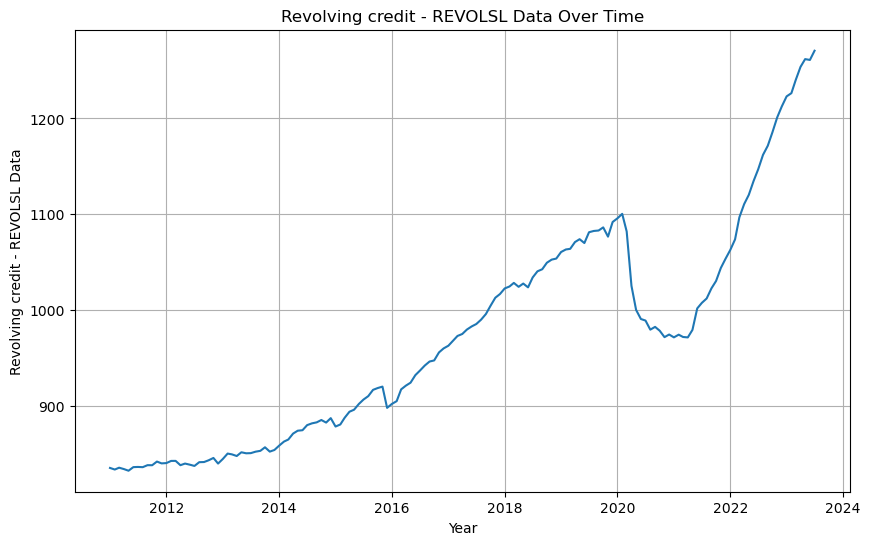

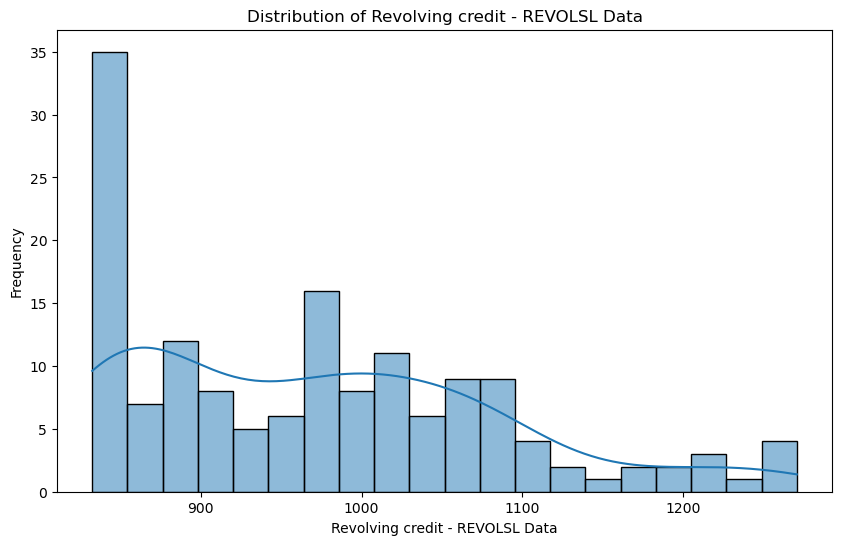

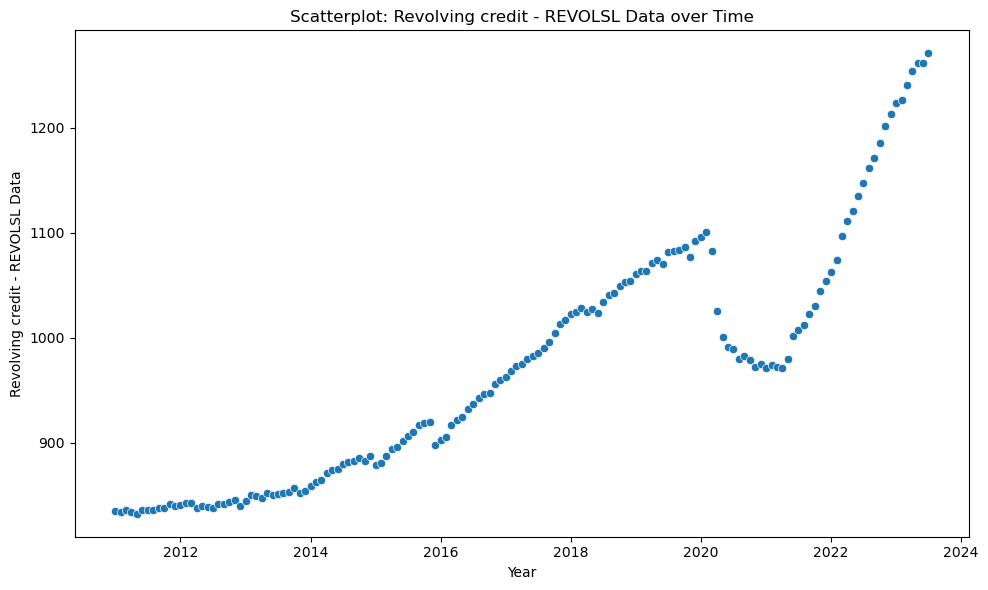

In [58]:
#  SCENARIO 1
# Revolving Consumer Credit Owned and Securitized from FRED

# This line plot shows an overall increasing trend in revolving credit from 2011 to the present, indicating growing card debt.
# The histogram highlights that the distribution of revolving credit is right skewed, with most values concentrating on the lower end
# The scatter plot illustrates the upward trend in revolving credit over time, suggesting an increase in consumer credit card usage

analyze_scenario_data(scenario_name='Revolving credit', fred_codes=['REVOLSL'])

Scenario 2: Mortgage Relationship Analysis - MORTGAGE30US Data:
            MORTGAGE30US
DATE                    
2011-01-06          4.77
2011-01-13          4.71
2011-01-20          4.74
2011-01-27          4.80
2011-02-03          4.81
Scenario 2: Mortgage Relationship Analysis - CSUSHPINSA Data:
            CSUSHPINSA
DATE                  
2011-01-01     139.040
2011-02-01     137.735
2011-03-01     137.788
2011-04-01     139.160
2011-05-01     140.694


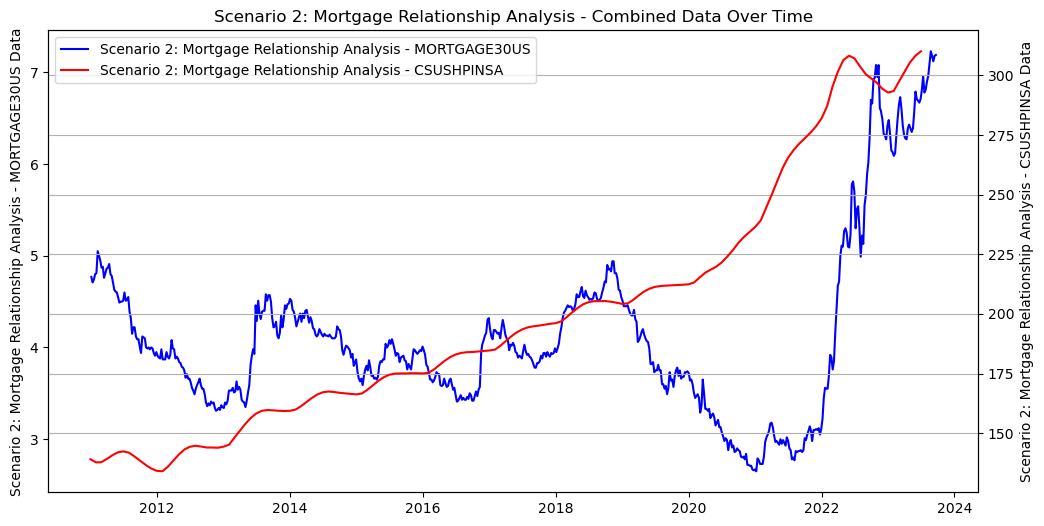

In [59]:
# Scenario 2: Mortgage Analysis
analyze_scenario_data(scenario_name='Scenario 2: Mortgage Relationship Analysis', fred_codes=['MORTGAGE30US', 'CSUSHPINSA'])

# The time series plot reveals an intriguing relationship between mortgage interest rates and the All-Transactions House Price Index.

In [9]:

import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

def analyze_scenario_yahoo_finance(stock_symbol):
    """
    Perform Exploratory Data Analysis (EDA) for Scenario 4: Publicly Traded Equity (Securities Lending of a Stock).

    Args:
        stock_symbol (str): The symbol of the publicly traded equity (e.g., AAPL for Apple).
    """
    # Define the date range for historical data (from January 1, 2011, to the present date)
    start_date = datetime.date(2011, 1, 1)
    end_date = datetime.date.today()  # Use today's date as the end date

    # Fetch daily historical data using yfinance
    daily_stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

    # Resample the daily data to annual data (end-of-year) for closing price and volume
    annual_stock_data = daily_stock_data.resample('Y').agg({
        'Close': 'last',
        'Volume': 'sum'
    })

    # Calculate annual returns
    annual_stock_data['Annual Returns'] = annual_stock_data['Close'].pct_change() * 100

    # Display the annual data as a table
    print(f"Annual {stock_symbol} historical data:")
    print(annual_stock_data)

    # Create Time Series Plot for Annual Close Price
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(annual_stock_data.index, annual_stock_data['Close'], label=f"Annual {stock_symbol} Close Price", color='blue')
    plt.xlabel("Year")
    plt.ylabel("Closing Price (USD)")
    plt.title(f"Annual {stock_symbol} Stock Price Over Time")
    plt.legend(loc='upper left')
    plt.grid(True)

    # Create Time Series Plot for Annual Volume Traded
    plt.subplot(2, 1, 2)
    plt.plot(annual_stock_data.index, annual_stock_data['Volume'], label=f"Annual {stock_symbol} Volume Traded", color='green')
    plt.xlabel("Year")
    plt.ylabel("Volume Traded")
    plt.title(f"Annual {stock_symbol} Volume Traded Over Time")
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Create Scatter Plot to Show Effect of Price on Volume Traded
    plt.figure(figsize=(12, 6))
    plt.scatter(annual_stock_data['Close'], annual_stock_data['Volume'], color='purple', alpha=0.7)
    plt.xlabel("Closing Price (USD)")
    plt.ylabel("Volume Traded")
    plt.title(f"Effect of Price on Volume Traded for {stock_symbol}")
    plt.grid(True)
    plt.show()

[*********************100%%**********************]  1 of 1 completed
Annual NFLX historical data:
                 Close       Volume  Annual Returns
Date                                               
2011-12-31    9.898571  11185849500             NaN
2012-12-31   13.227143  10215947000       33.626796
2013-12-31   52.595715   6915790700      297.634723
2014-12-31   48.801430   4898415200       -7.214057
2015-12-31  114.379997   4681123800      134.378373
2016-12-31  123.800003   3234743600        8.235711
2017-12-31  191.960007   1654091200       55.056544
2018-12-31  267.660004   2878875800       39.435296
2019-12-31  323.570007   1980147700       20.888442
2020-12-31  540.729980   1754276900       67.113752
2021-12-31  602.440002    986504500       11.412354
2022-12-31  294.880005   2729948900      -51.052386
2023-12-31  376.750000   1296301300       27.763834


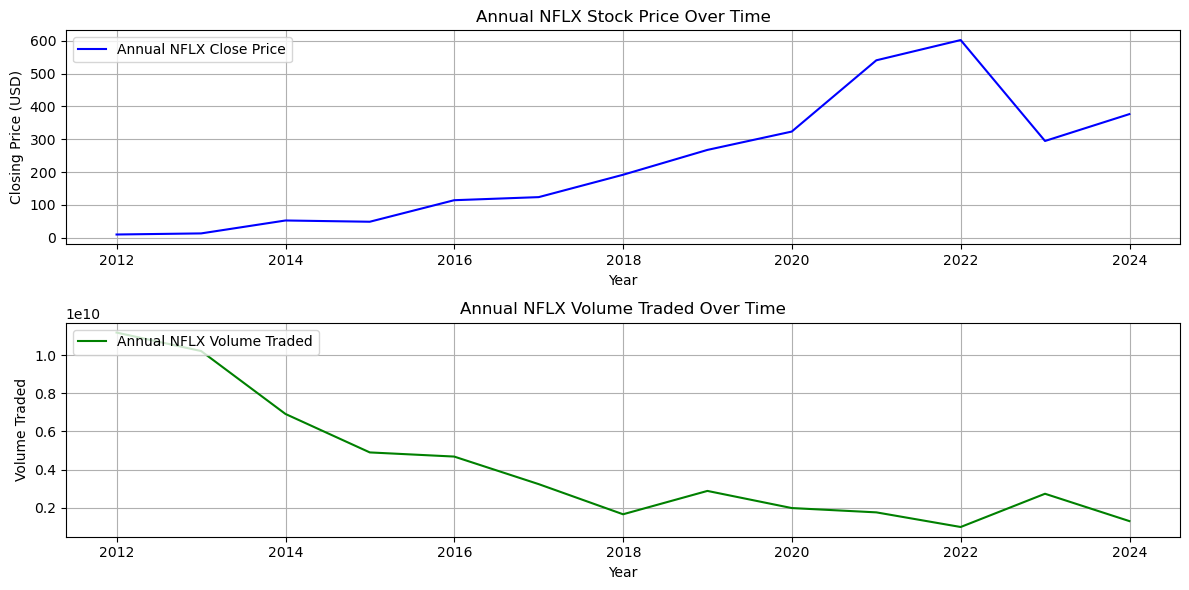

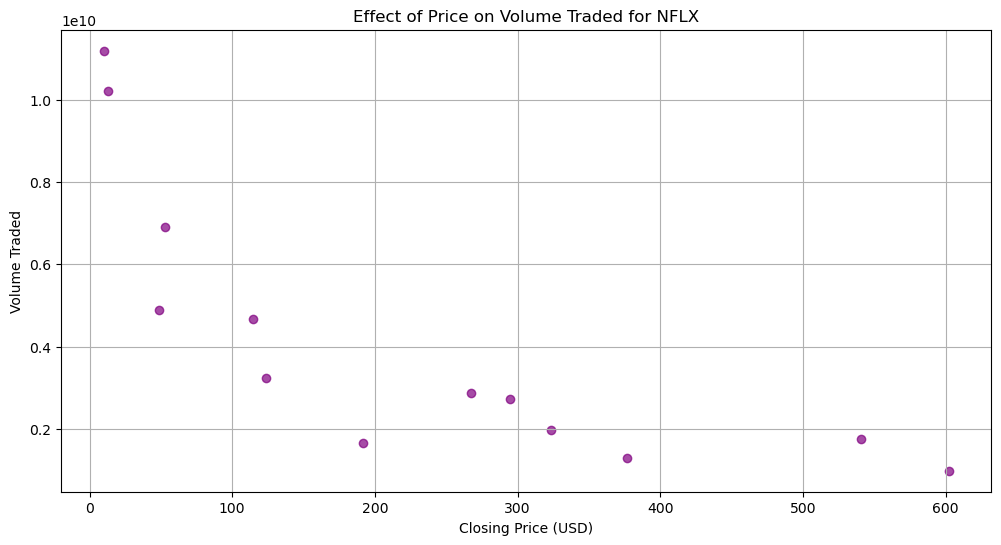

In [10]:
# SCENARIO 4

analyze_scenario_yahoo_finance("NFLX")
# - The time series plot shows the historical stock price of Netflix (NFLX) from 2011 to the present.
# - The distribution plot illustrates the distribution of closing prices, indicating the spread and frequency of price values.

Consolidated Annualized Data (Last 10 Years):
 Year  Annualized Interest Rate  Annualized Volume Traded  Annualized Price (*1000$)
 2014                  4.290000                     451.0                 164.684000
 2015                  3.850000                     482.0                 175.051000
 2016                  3.770000                    1119.0                 184.177000
 2017                  3.940000                     619.0                 192.271000
 2018                  4.493333                    1922.0                 200.198333
 2019                  3.750000                     720.0                 211.708000
 2020                  2.880000                    1027.0                 229.830000
 2021                  3.080000                    1570.0                 257.700500
 2022                  6.075000                    1203.0                 297.465000
 2023                  6.790000                     684.0                 308.316000


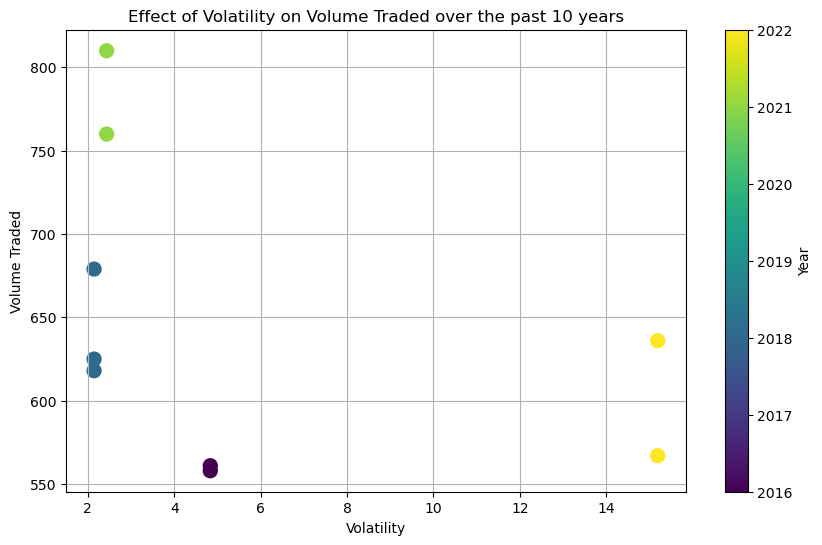

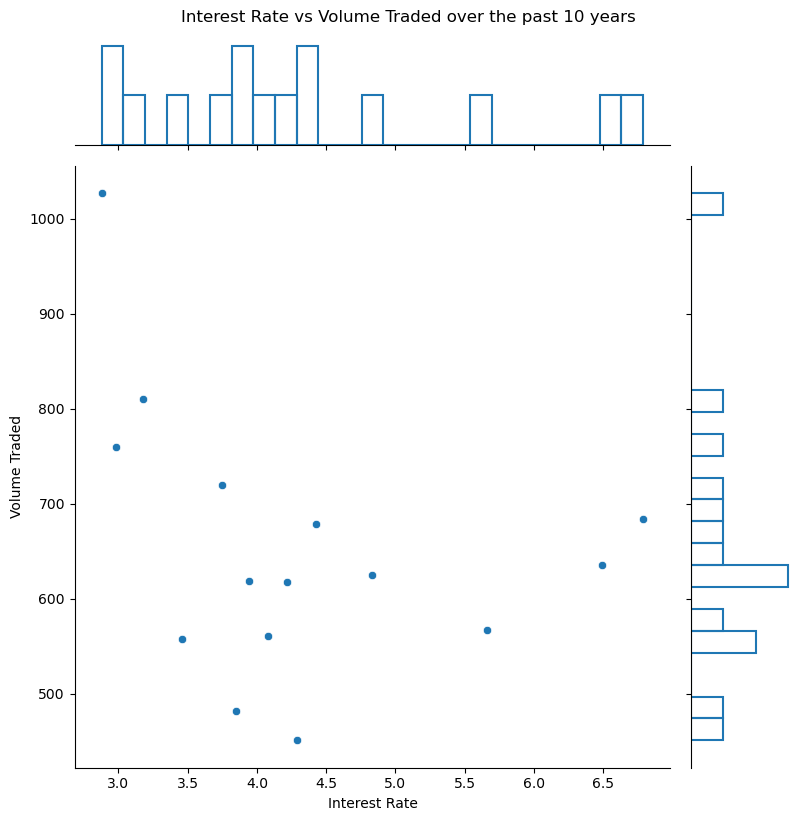

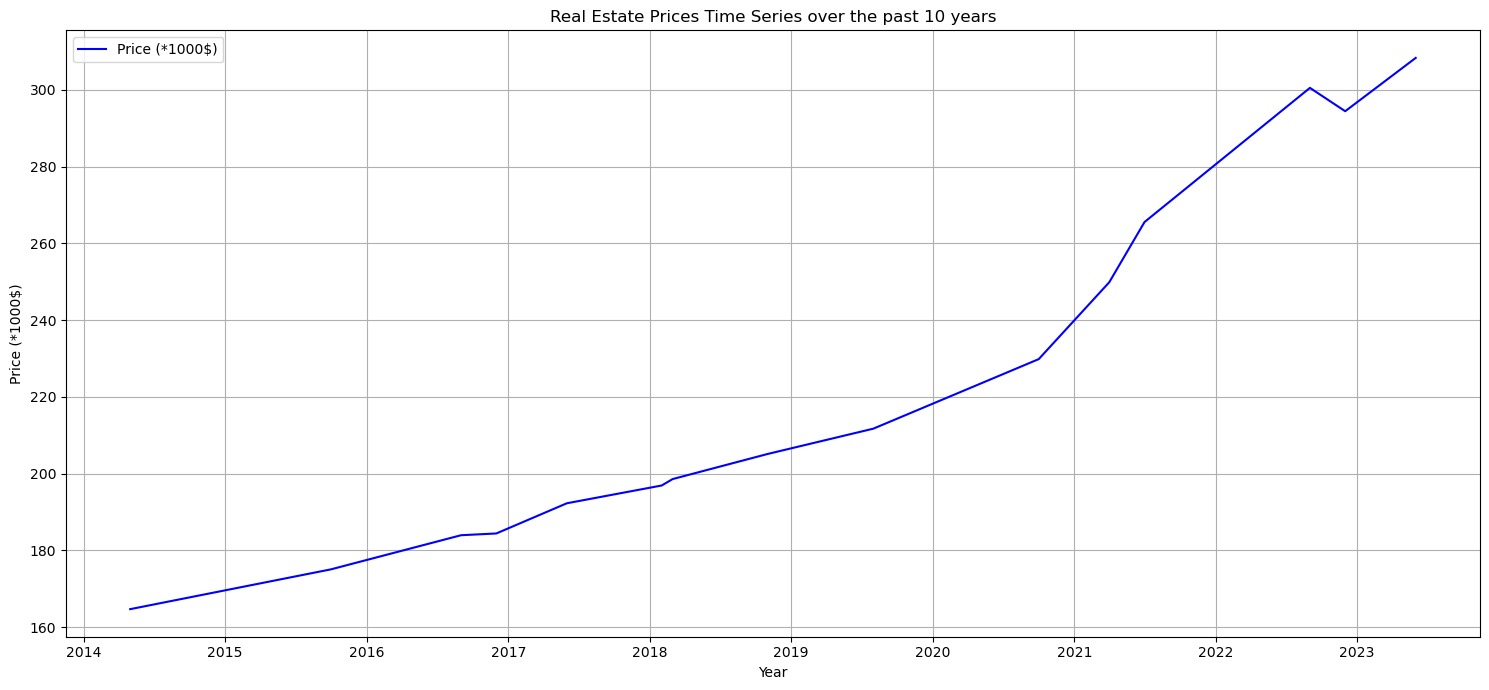

In [12]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

api_key = '9408081e16ebf5ba61625f81b50f9f96'

interest_rate_series_id = 'MORTGAGE30US'  # 30-Year Mortgage Rate
volume_traded_series_id = 'HSN1F'  # New One Family Houses Sold: United States
price_series_id = 'CSUSHPINSA'  # S&P/Case-Shiller U.S. National Home Price Index

base_url = 'https://api.stlouisfed.org/fred/series/observations'

def get_data(series_id):
    url = f'{base_url}?series_id={series_id}&api_key={api_key}&file_type=json'
    response = requests.get(url)
    data = response.json()['observations']
    return pd.DataFrame(data)

# Fetch Data
interest_rate_df = get_data(interest_rate_series_id)
volume_traded_df = get_data(volume_traded_series_id)
price_df = get_data(price_series_id)

interest_rate_df['value'] = pd.to_numeric(interest_rate_df['value'], errors='coerce')
volume_traded_df['value'] = pd.to_numeric(volume_traded_df['value'], errors='coerce')
price_df['value'] = pd.to_numeric(price_df['value'], errors='coerce')

# Merge data
merged_df = pd.merge(interest_rate_df[['date', 'value']], volume_traded_df[['date', 'value']], on='date', suffixes=('_interest_rate', '_volume_traded'))
merged_df = pd.merge(merged_df, price_df[['date', 'value']], on='date')
merged_df.columns = ['Date', 'Interest Rate', 'Volume Traded', 'Price (*1000$)']

merged_df.dropna(subset=['Interest Rate', 'Volume Traded', 'Price (*1000$)'], inplace=True)
merged_df['Year'] = pd.to_datetime(merged_df['Date']).dt.year

# Calculate volatility
merged_df['Returns'] = merged_df['Price (*1000$)'].pct_change() * 100
merged_df['Volatility'] = merged_df.groupby('Year')['Returns'].transform(lambda x: x.std() * np.sqrt(len(x)))

# Filter the last 10 years' data
start_year = merged_df['Year'].max() - 9
filtered_df = merged_df[merged_df['Year'] >= start_year]

# Calculate annual averages for interest rates, volume traded, and real estate prices
annualized_interest_rate = filtered_df.groupby('Year')['Interest Rate'].mean()
annualized_volume_traded = filtered_df.groupby('Year')['Volume Traded'].sum()
annualized_real_estate_prices = filtered_df.groupby('Year')['Price (*1000$)'].mean()

# Create DataFrames for annualized data
annualized_interest_rate_df = annualized_interest_rate.to_frame().reset_index().rename(columns={'Interest Rate': 'Annualized Interest Rate'})
annualized_volume_traded_df = annualized_volume_traded.to_frame().reset_index().rename(columns={'Volume Traded': 'Annualized Volume Traded'})
annualized_real_estate_prices_df = annualized_real_estate_prices.to_frame().reset_index().rename(columns={'Price (*1000$)': 'Annualized Price (*1000$)'})

# Merge all annualized data into one table
annualized_data = pd.merge(annualized_interest_rate_df, annualized_volume_traded_df, on='Year')
annualized_data = pd.merge(annualized_data, annualized_real_estate_prices_df, on='Year')

# Display the consolidated table
print("Consolidated Annualized Data (Last 10 Years):")
print(annualized_data.to_string(index=False))

# Plot Volatility vs Volume Traded
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['Volatility'], filtered_df['Volume Traded'], c=filtered_df['Year'], cmap='viridis', s=100)
plt.colorbar(label='Year')
plt.xlabel('Volatility')
plt.ylabel('Volume Traded')
plt.title('Effect of Volatility on Volume Traded over the past 10 years')
plt.grid(True)
plt.show()

# Plot Interest Rate vs Volume Traded
sns.jointplot(x='Interest Rate', y='Volume Traded', data=filtered_df, kind='scatter', height=8, marginal_kws=dict(bins=25, fill=False))
plt.suptitle('Interest Rate vs Volume Traded over the past 10 years', y=1.02)
plt.show()

# Time Series Plot for Real Estate
plt.figure(figsize=(15, 7))
plt.plot(pd.to_datetime(filtered_df['Date']), filtered_df['Price (*1000$)'], label='Price (*1000$)', color='b')
plt.title('Real Estate Prices Time Series over the past 10 years')
plt.xlabel('Year')
plt.ylabel('Price (*1000$)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()